# Project 3 – Ensemble Learning on Red Wine Quality Dataset

This notebook implements an ensemble learning pipeline on the **UCI Red Wine Quality** dataset downloaded via **kagglehub**.

It includes:
- Dataset download from Kaggle using `kagglehub`
- Basic exploratory data analysis (EDA)
- Train/test split
- Multiple ensemble models (Random Forest, Gradient Boosting, Bagging, Voting Regressor)
- Performance comparison and visualizations


## 1. Setup and Dataset Download

If you haven't installed the required packages yet, uncomment and run the `pip install` line below. Then we use `kagglehub` to download the **red wine quality** dataset.

In [36]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
    VotingRegressor
)
from sklearn.metrics import mean_squared_error, r2_score

# Download the red wine quality dataset from Kaggle via kagglehub
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
print("Path to dataset files:", path)
print("Files in folder:", os.listdir(path))

Path to dataset files: C:\Users\KmanT\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2
Files in folder: ['winequality-red.csv']


## 2. Load and Inspect the Data

Here we load **`winequality-red.csv`**, inspect the first few rows, check data types, summary statistics, and missing values. We also look at the distribution of the target variable `quality`.

Data preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality             

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


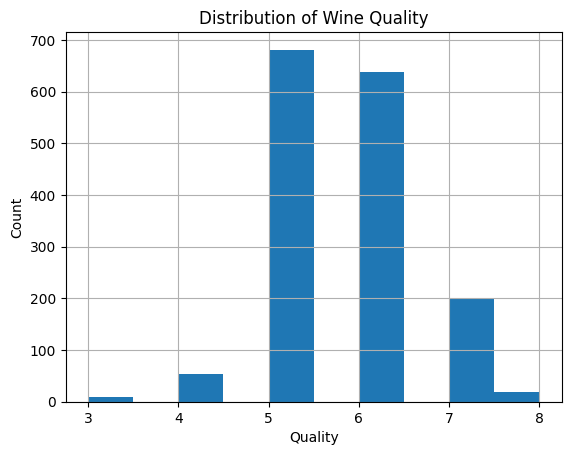

In [33]:
# Load the red wine dataset
csv_path = os.path.join(path, "winequality-red.csv")
df = pd.read_csv(csv_path)

print("Data preview:")
display(df.head())

print("\nColumns:", df.columns.tolist())

print("\nData info:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())

print("\nMissing values per column:")
print(df.isna().sum())

# Plot distribution of the target variable (quality)
plt.figure()
df["quality"].hist(bins=10)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

## 3. Define Features and Train/Test Split

- **Target variable (`y`)**: `quality`
- **Input features (`X`)**: all remaining columns.

We then split the dataset into training and testing sets.

In [29]:
# Define features X and target y
X = df.drop("quality", axis=1)
y = df["quality"]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Feature shape: (1599, 11)
Target shape: (1599,)
Train shape: (1279, 11) Test shape: (320, 11)


## 4. Ensemble Model Development

We implement and compare **four ensemble methods**:

1. `RandomForestRegressor`
2. `GradientBoostingRegressor`
3. `BaggingRegressor` (with a Random Forest base estimator)
4. `VotingRegressor` combining the above models

We evaluate models using **MSE**, **RMSE**, and **R²**.

In [34]:
# Define ensemble models
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

bag = BaggingRegressor(
    estimator=RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

voting = VotingRegressor(
    estimators=[
        ("rf", rf),
        ("gb", gb),
        ("bag", bag)
    ]
)

models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Bagging (RF base)": bag,
    "Voting Regressor": voting
}

# Train, evaluate, and compare models
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")

    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results)
print("\nModel comparison:")
display(results_df)


Training Random Forest...
Random Forest - MSE: 0.3059, RMSE: 0.5531, R^2: 0.5319

Training Gradient Boosting...
Gradient Boosting - MSE: 0.3635, RMSE: 0.6029, R^2: 0.4438

Training Bagging (RF base)...
Bagging (RF base) - MSE: 0.3196, RMSE: 0.5653, R^2: 0.5110

Training Voting Regressor...
Voting Regressor - MSE: 0.3194, RMSE: 0.5652, R^2: 0.5113

Model comparison:


,Model,MSE,RMSE,R2
0,Random Forest,0.305917,0.553097,0.531884
1,Gradient Boosting,0.363513,0.602920,0.443750
2,Bagging (RF base),0.319556,0.565293,0.511013
3,Voting Regressor,0.319398,0.565153,0.511254


## 5. Visualize Model Performance

We plot **RMSE** and **R²** for each model to visually compare performance.

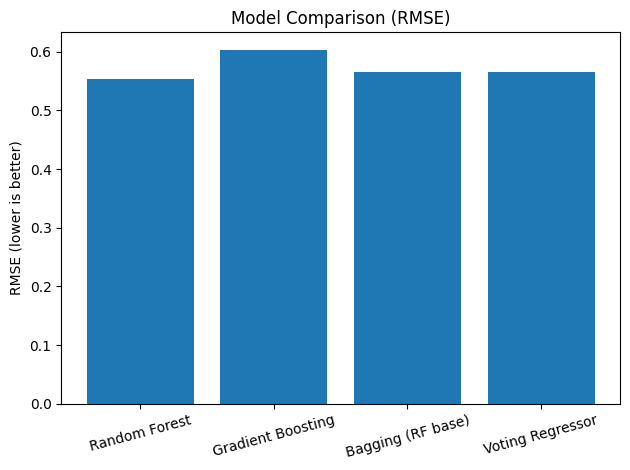

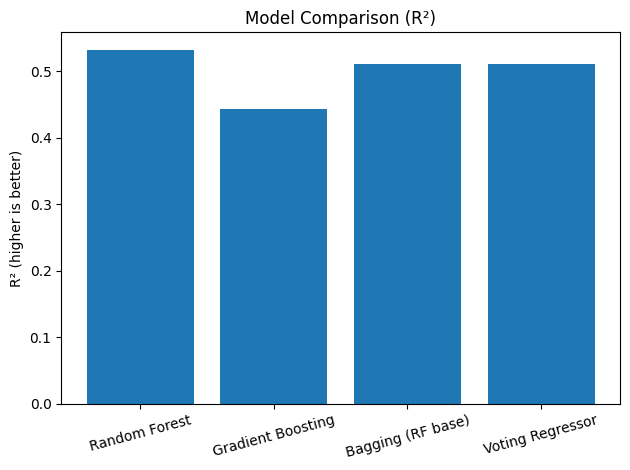

In [31]:
# Plot RMSE for each model
plt.figure()
plt.bar(results_df["Model"], results_df["RMSE"])
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE (lower is better)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot R^2 for each model
plt.figure()
plt.bar(results_df["Model"], results_df["R2"])
plt.title("Model Comparison (R²)")
plt.ylabel("R² (higher is better)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## 6. Feature Importance (Random Forest)

Finally, we inspect feature importances from the **Random Forest** model to see which physicochemical properties of the wine are most influential in predicting quality.

Why We Used Random Forest for Feature Importance

We used Random Forest to compute and display feature importance because it offers a built-in, reliable, and easy-to-understand method for showing how each feature contributes to the model’s predictions. Random Forest averages importance values across many trees, which helps create stable and consistent results.

In comparison, the other ensemble methods used in this project (Gradient Boosting, Bagging, and Voting Regressors) either do not provide meaningful feature importance scores or do not support them at all.

Because of this, Random Forest is the most appropriate choice for visualizing feature importance in our analysis.

Feature importances (Random Forest):


,feature,importance
10,alcohol,0.272652
9,sulphates,0.151100
1,volatile acidity,0.108390
6,total sulfur dioxide,0.077636
4,chlorides,0.070043
8,pH,0.061484
3,residual sugar,0.058068
7,density,0.052488
0,fixed acidity,0.052336
2,citric acid,0.048978


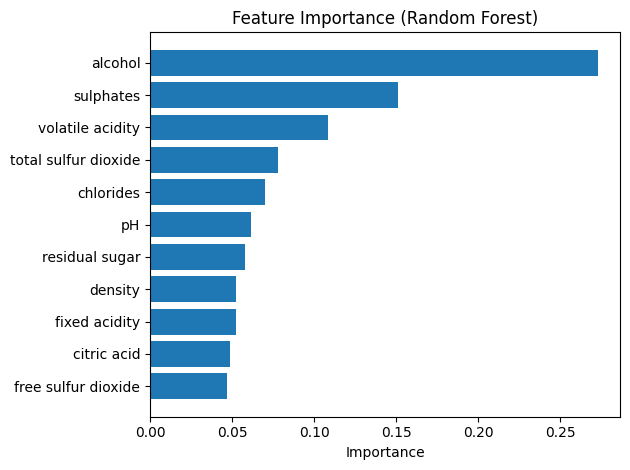

In [35]:
# Feature importance from Random Forest
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print("Feature importances (Random Forest):")
display(feat_imp)

plt.figure()
plt.barh(feat_imp["feature"], feat_imp["importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()